In [1]:
import pandas as pd
import numpy as np
import scipy.optimize as optimize
import matplotlib.pyplot as plt
import qeds
%matplotlib inline
import os
import math
import qeds
qeds.themes.mpl_style();

from IPython.display import display
import statistics

In [2]:
bonds = pd.read_csv('10Bonds_ytm.csv')
bonds

,Coupon,bond_name,CAN 0.25 Aug 22,CAN 0.25 Feb 23,CAN 0.25 Aug 23,CAN 0.75 Feb 24,CAN 1.50 Sept 24,CAN 1.25 Mar 25,CAN 0.50 Sept 25,CAN 0.25 Mar 26,...,ttm1,ttm2,ttm3,ttm4,ttm5,ttm6,ttm7,ttm8,ttm9,ttm10
0,0.25,D1,99.80,99.31,98.80,99.20,100.56,99.64,96.66,95.11,...,0.556,1.056,1.556,2.056,2.639,3.139,3.639,4.139,4.639,5.139
1,0.25,D2,99.79,99.26,98.80,99.20,100.63,99.67,96.72,95.17,...,0.553,1.053,1.553,2.053,2.636,3.136,3.636,4.136,4.636,5.136
2,0.25,D3,99.78,99.29,98.78,99.16,100.62,99.61,96.77,95.12,...,0.550,1.050,1.550,2.050,2.633,3.133,3.633,4.133,4.633,5.133
3,0.75,D4,99.77,99.28,98.76,99.13,100.58,99.59,96.77,95.14,...,0.547,1.047,1.547,2.047,2.631,3.131,3.631,4.131,4.631,5.131
4,1.50,D5,99.76,99.26,98.73,99.09,100.52,99.49,96.68,95.04,...,0.544,1.044,1.544,2.044,2.628,3.128,3.628,4.128,4.628,5.128
5,1.25,D6,99.72,99.18,98.61,98.92,100.29,99.25,96.43,97.75,...,0.536,1.036,1.536,2.036,2.619,3.119,3.619,4.119,4.619,5.119
6,0.50,D7,99.70,99.12,98.55,98.84,100.21,99.12,96.26,94.53,...,0.533,1.033,1.533,2.033,2.617,3.117,3.617,4.117,4.617,5.117
7,0.25,D8,99.70,99.10,98.54,98.84,100.15,99.11,96.15,94.50,...,0.531,1.031,1.531,2.031,2.614,3.114,3.614,4.114,4.614,5.114
8,1.00,D9,99.72,99.15,98.55,98.83,100.17,99.10,96.19,94.52,...,0.528,1.027,1.528,2.027,2.611,3.111,3.611,4.111,4.611,5.111
9,1.25,D10,99.74,99.20,98.61,98.90,100.27,99.26,96.31,94.70,...,0.525,1.025,1.525,2.025,2.608,3.108,3.608,4.108,4.608,5.108


In [3]:
def lst(df, grp):
    y = df[grp].values.tolist()
    return y

name = ["CAN 0.25 Aug 22", "CAN 0.25 Feb 23", "CAN 0.25 Aug 23", "CAN 0.75 Feb 24", "CAN 1.50 Sept 24", 
        "CAN 1.25 Mar 25", "CAN 0.50 Sept 25", "CAN 0.25 Mar 26", "CAN 1.00 Sept 26", "CAN 1.25 Mar 27"]
cpn = lst(bonds, "Coupon")
t1 = lst(bonds, "ttm1")
t2 = lst(bonds, "ttm2")
t3 = lst(bonds, "ttm3")
t4 = lst(bonds, "ttm4")
t5 = lst(bonds, "ttm5")
t6 = lst(bonds, "ttm6")
t7 = lst(bonds, "ttm7")
t8 = lst(bonds, "ttm8")
t9 = lst(bonds, "ttm9")
t10 = lst(bonds, "ttm10")
b1 = lst(bonds, "CAN 0.25 Aug 22")
b2 = lst(bonds,"CAN 0.25 Feb 23")
b3 = lst(bonds,"CAN 0.25 Aug 23")
b4 = lst(bonds,"CAN 0.75 Feb 24")
b5 = lst(bonds,"CAN 1.50 Sept 24")
b6 = lst(bonds,"CAN 1.25 Mar 25")
b7 = lst(bonds,"CAN 0.50 Sept 25")
b8 = lst(bonds,"CAN 0.25 Mar 26")
b9 = lst(bonds,"CAN 1.00 Sept 26")
b10 = lst(bonds,"CAN 1.25 Mar 27")

dates = ["Jan 10","Jan 11","Jan 12","Jan 13","Jan 14","Jan 17","Jan 18","Jan 19","Jan 20","Jan 21"]
ttm = [t1,t2,t3,t4,t5,t6,t7,t8,t9,t10]
bd = [b1,b2,b3,b4,b5,b6,b7,b8,b9,b10]

In [4]:
def bond_ytm(price, par, T, coup, guess=0.05):
    T = float(T)
    dt = [(i+1)/2 for i in range(int(T))]
    ytm_func = lambda y: \
    sum([coup*math.exp((-1)*y*t) for t in dt]) + par*math.exp((-1)*y*T) - price
    return optimize.newton(ytm_func, guess)


ytm_all = []
for b in bd:
    for t in ttm:
        ytm_fl = []
        for i in range(10):
            y = bond_ytm(b[i],100,t[i],cpn[i])
            ytm_fl.append(y)
    ytm_float = [round(elem, 5) for elem in ytm_fl]
    ytm_all.append(ytm_float)


In [5]:
ytm_dict = {"ytm1": ytm_all[0], "ytm2": ytm_all[1], "ytm3": ytm_all[2], "ytm4": ytm_all[3],
           "ytm5": ytm_all[4], "ytm6": ytm_all[5], "ytm7": ytm_all[6], "ytm8": ytm_all[7],
           "ytm9": ytm_all[8], "ytm10": ytm_all[9]}

ttm_dict = {"t1": ttm[0], "t2": ttm[1], "t3": ttm[2], "t4": ttm[3],
           "t5": ttm[4], "t6": ttm[5], "t7": ttm[6], "t8": ttm[7],
           "t9": ttm[8], "t10": ttm[9]}

ttm_df = pd.DataFrame(ttm_dict)
ttmT_df = ttm_df.T.reset_index()
ytm_df = pd.DataFrame(ytm_dict)
ytmT_df = ytm_df.T.reset_index()

ytms = pd.merge(ttmT_df, ytmT_df, left_index=True, right_index=True)
ytms

,index_x,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,...,0_y,1_y,2_y,3_y,4_y,5_y,6_y,7_y,8_y,9_y
0,t1,0.556,0.553,0.550,0.547,0.544,0.536,0.533,0.531,0.528,...,0.00283,0.00285,0.00287,0.00783,0.01535,0.01294,0.00551,0.00304,0.01045,0.01293
1,t2,1.056,1.053,1.050,1.047,1.044,1.036,1.033,1.031,1.027,...,0.00380,0.00390,0.00384,0.00881,0.01638,0.01405,0.00667,0.00423,0.01162,0.01404
2,t3,1.556,1.553,1.550,1.547,1.544,1.536,1.533,1.531,1.528,...,0.00481,0.00481,0.00485,0.00986,0.01749,0.01523,0.00782,0.00535,0.01285,0.01526
3,t4,2.056,2.053,2.050,2.047,2.044,2.036,2.033,2.031,2.027,...,0.00402,0.00402,0.00410,0.00911,0.01674,0.01459,0.00723,0.00475,0.01227,0.01466
4,t5,2.639,2.636,2.633,2.631,2.628,2.619,2.617,2.614,2.611,...,0.00134,0.00121,0.00123,0.00621,0.01379,0.01178,0.00449,0.00215,0.00954,0.01184
5,t6,3.139,3.136,3.133,3.131,3.128,3.119,3.117,3.114,3.111,...,0.00315,0.00309,0.00321,0.00819,0.01591,0.01391,0.00667,0.00421,0.01172,0.01392
6,t7,3.639,3.636,3.633,3.631,3.628,3.619,3.617,3.614,3.611,...,0.00911,0.00899,0.00890,0.01394,0.02181,0.01980,0.01250,0.01020,0.01776,0.02009
7,t8,4.139,4.136,4.133,4.131,4.128,4.119,4.117,4.114,4.111,...,0.01228,0.01217,0.01228,0.01734,0.02533,0.01702,0.01610,0.01361,0.02132,0.02355
8,t9,4.639,4.636,4.633,4.631,4.628,4.619,4.617,4.614,4.611,...,0.00709,0.00701,0.00708,0.01204,0.01990,0.01809,0.01093,0.00854,0.01606,0.01817
9,t10,5.139,5.136,5.133,5.131,5.128,5.119,5.117,5.114,5.111,...,0.00559,0.00547,0.00561,0.01051,0.01836,0.01660,0.00954,0.00712,0.01464,0.01666


In [7]:
col1 = lst(ytms, "0_x")
col2 = lst(ytms, "1_x")
col3 = lst(ytms, "2_x")
col4 = lst(ytms, "3_x")
col5 = lst(ytms, "4_x")
col6 = lst(ytms, "5_x")
col7 = lst(ytms, "6_x")
col8 = lst(ytms, "7_x")
col9 = lst(ytms, "8_x")
col10 = lst(ytms, "9_x")
maturity = [col1,col2,col3,col4,col5,col6,col7,col8,col9,col10]

y1 = lst(ytms, "0_y")
y2 = lst(ytms, "1_y")
y3 = lst(ytms, "2_y")
y4 = lst(ytms, "3_y")
y5 = lst(ytms, "4_y")
y6 = lst(ytms, "5_y")
y7 = lst(ytms, "6_y")
y8 = lst(ytms, "7_y")
y9 = lst(ytms, "8_y")
y10 = lst(ytms, "9_y")
y = [y1,y2,y3,y4,y5,y6,y7,y8,y9,y10]

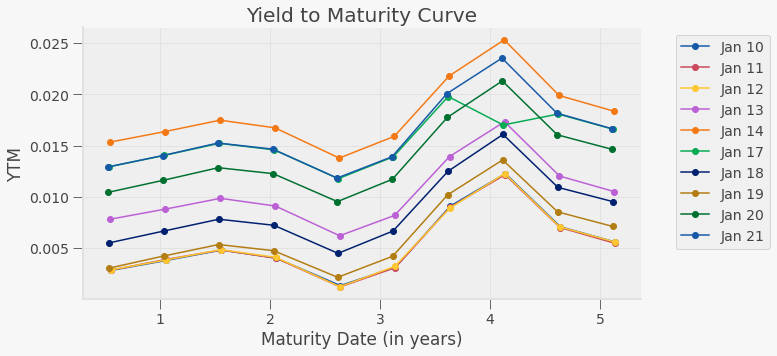

In [9]:
plt.figure(figsize=(10,5))
for i in range(0, 10):
    plt.plot(maturity[i], y[i], label=dates[i],marker='o')
plt.xlabel('Maturity Date (in years)')
plt.ylabel('YTM')

plt.title("Yield to Maturity Curve")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left');